In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import feature_selection as fs
from sklearn import preprocessing
from scipy import signal

In [2]:
from pandas import ExcelFile

In [3]:
data = pd.read_excel('FeaturesValues.xlsx', header=1)
data.head()

,Unnamed: 0,max. Amplitude Right,Unnamed: 2,Unnamed: 3,Unnamed: 4,Integral Right,Unnamed: 6,Unnamed: 7,Unnamed: 8,max. Amplitude Left,...,Unnamed: 16,abs(Int.L-Int.R),Int.L+Int.R,abs(Int.L-Int.R).1,Int.L+Int.R.1,abs(Int.L-Int.R).2,Int.L+Int.R.2,abs(Int.L-Int.R).3,Int.L+Int.R.3,Unnamed: 25
0,Label,10-12500,500-1000,1000-1500,7500-8000,10-12500,500-1000,1000-1500,7500-8000,10-12500,...,7500-8000,10-12500,10-12500,500-1000,500-1000,1000-1500,1000-1500,7500-8000,7500-8000,PenType
1,0,16.3204,16.3204,7.39846,2.01277,7.42302,3.72127,1.46043,0.875289,22.6196,...,0.789872,0.825667,15.6717,0.122235,7.56478,0.509929,3.43078,0.085417,1.66516,M4
2,0,59.2658,59.2658,4.58665,1.65016,12.4527,8.51801,1.6767,0.58734,28.8541,...,0.186056,1.1861,23.7192,1.59408,15.4419,0.764726,4.11813,0.401284,0.773396,M4
3,0,22.1542,22.1542,11.3877,3.14866,9.54954,4.72982,2.10357,1.10204,14.717,...,0.490615,1.68445,17.4146,1.71407,7.74558,0.202009,4.40915,0.611429,1.59266,M4
4,1,17.317,15.3166,17.317,4.19054,9.9764,2.85192,3.43175,1.2164,19.9769,...,0.29208,1.72782,18.225,0.178184,5.88203,0.107414,6.97092,0.924322,1.50848,M4


In [4]:
xls = pd.ExcelFile('FeaturesValues.xlsx')
xls = xls.parse( skiprows=2, index_col=None, na_values=['NA'])
xls=xls.drop(xls.columns[len(xls.columns)-1],axis=1)
xls

,Label,10-12500,500-1000,1000-1500,7500-8000,10-12500.1,500-1000.1,1000-1500.1,7500-8000.1,10-12500.2,...,1000-1500.3,7500-8000.3,10-12500.4,10-12500.5,500-1000.4,500-1000.5,1000-1500.4,1000-1500.5,7500-8000.4,7500-8000.5
0,0,16.320440,16.320440,7.398460,2.012775,7.423021,3.721272,1.460425,0.875289,22.619635,...,1.970354,0.789872,0.825667,15.671709,0.122235,7.564780,0.509929,3.430779,0.085417,1.665161
1,0,59.265753,59.265753,4.586654,1.650161,12.452657,8.518008,1.676704,0.587340,28.854146,...,2.441430,0.186056,1.186097,23.719217,1.594081,15.441935,0.764726,4.118134,0.401284,0.773396
2,0,22.154235,22.154235,11.387735,3.148665,9.549542,4.729822,2.103572,1.102044,14.716988,...,2.305581,0.490615,1.684450,17.414634,1.714066,7.745578,0.202009,4.409152,0.611429,1.592659
3,1,17.316986,15.316602,17.316986,4.190537,9.976401,2.851924,3.431755,1.216401,19.976927,...,3.539169,0.292080,1.727819,18.224983,0.178184,5.882032,0.107414,6.970924,0.924322,1.508481
4,1,10.101065,10.101065,5.519555,1.979642,4.513550,1.869357,1.128628,0.480537,33.964781,...,3.651327,0.330239,9.288578,18.315677,5.398514,9.137228,2.522698,4.779955,0.150298,0.810776
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0,31.214287,22.988793,31.214287,0.594067,18.033293,4.346499,8.493928,0.218962,54.566976,...,8.429369,0.125704,0.847462,36.914048,0.642332,8.050667,0.064559,16.923297,0.093259,0.344666
346,0,100.509582,17.386822,100.509582,0.756998,36.389360,5.652329,22.772308,0.267712,237.327176,...,55.542846,0.835562,117.574367,190.353087,27.471104,38.775761,32.770539,78.315154,0.567851,1.103274
347,0,0.497392,0.007656,0.001532,0.000001,0.046128,0.001057,0.000173,0.000000,0.406391,...,0.000116,0.000000,0.007808,0.084447,0.000138,0.001976,0.000058,0.000289,0.000000,0.000000
348,0,0.483138,0.005590,0.000590,0.000001,0.038228,0.000845,0.000114,0.000001,0.754672,...,0.000124,0.000000,0.009366,0.085823,0.000325,0.002015,0.000010,0.000238,0.000000,0.000001


In [5]:
xls1 = pd.ExcelFile('FeaturesValues.xlsx')
xls1 = xls1.parse( skiprows=2, index_col=None, na_values=['NA'])
xls1
xls1.iloc[80]['PenType']

'M2'

In [6]:
Y=xls[xls.columns[0]]
X=xls.drop(xls.columns[0],axis=1)
X,Y

(       10-12500   500-1000   1000-1500  7500-8000  10-12500.1  500-1000.1  \
 0     16.320440  16.320440    7.398460   2.012775    7.423021    3.721272   
 1     59.265753  59.265753    4.586654   1.650161   12.452657    8.518008   
 2     22.154235  22.154235   11.387735   3.148665    9.549542    4.729822   
 3     17.316986  15.316602   17.316986   4.190537    9.976401    2.851924   
 4     10.101065  10.101065    5.519555   1.979642    4.513550    1.869357   
 ..          ...        ...         ...        ...         ...         ...   
 345   31.214287  22.988793   31.214287   0.594067   18.033293    4.346499   
 346  100.509582  17.386822  100.509582   0.756998   36.389360    5.652329   
 347    0.497392   0.007656    0.001532   0.000001    0.046128    0.001057   
 348    0.483138   0.005590    0.000590   0.000001    0.038228    0.000845   
 349    0.190281   0.007018    0.001402   0.000001    0.030371    0.000801   
 
      1000-1500.1  7500-8000.1  10-12500.2  500-1000.2  ...  1

In [7]:
xls.Label.value_counts()

0    179
1    171
Name: Label, dtype: int64

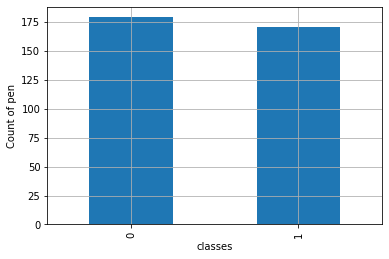

In [8]:
%matplotlib inline
xls.Label.value_counts().plot.bar()
plt.grid()
plt.xlabel("classes")
plt.ylabel("Count of pen")
plt.show()

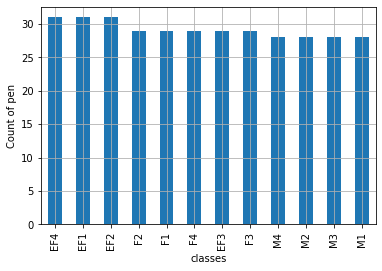

In [9]:
%matplotlib inline
xls1.PenType.value_counts().plot.bar()
plt.grid()
plt.xlabel("classes")
plt.ylabel("Count of pen")
plt.show()

Text(0, 0.5, 'max amplitude 7500-8000.5')

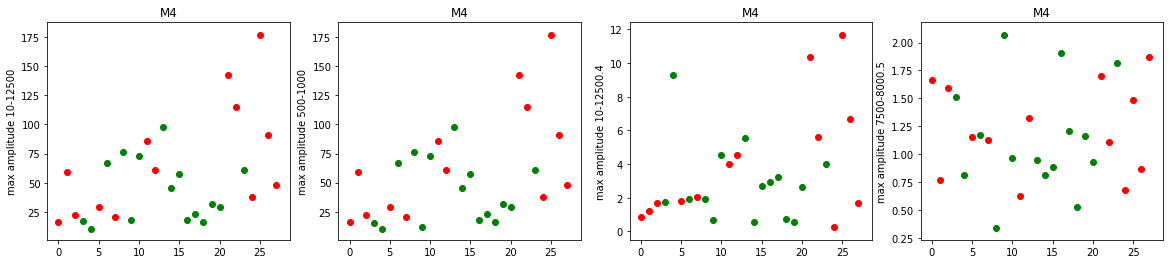

In [10]:
# create color dictionary
colors = {0:'r', 1:'g'}
# create a figure and axis
# fig, ax = plt.subplots()
fig, (ax1, ax2,ax3,ax4) = plt.subplots(nrows=1, ncols=4,
                                figsize=(20, 4))
# plot each data-point
for i in range(xls1.shape[0]-1):
    if(xls1.iloc[i]['PenType']== "M4"):
        ax1.scatter(i, xls1.iloc[i]['10-12500'],color=colors[xls1.iloc[i]['Label']])
# set a title and labels
ax1.set_title('M4')
ax1.set_xlabel('')
ax1.set_ylabel('max amplitude 10-12500')

for i in range(xls1.shape[0]-1):
    if(xls1.iloc[i]['PenType']== "M4"):
        ax2.scatter(i, xls1.iloc[i]['500-1000'],color=colors[xls1.iloc[i]['Label']])
# set a title and labels
ax2.set_title('M4')
ax2.set_xlabel('')
ax2.set_ylabel('max amplitude 500-1000')

for i in range(xls1.shape[0]-1):
    if(xls1.iloc[i]['PenType']== "M4"):
        ax3.scatter(i, xls1.iloc[i]['10-12500.4'],color=colors[xls1.iloc[i]['Label']])
# set a title and labels
ax3.set_title('M4')
ax3.set_xlabel('')
ax3.set_ylabel('max amplitude 10-12500.4')

for i in range(xls1.shape[0]-1):
    if(xls1.iloc[i]['PenType']== "M4"):
        ax4.scatter(i, xls1.iloc[i]['7500-8000.5'],color=colors[xls1.iloc[i]['Label']])
# set a title and labels
ax4.set_title('M4')
ax4.set_xlabel('')
ax4.set_ylabel('max amplitude 7500-8000.5')

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

### RBF

In [12]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC
svclassifier = SVC(C=1,kernel='rbf',gamma='auto')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy=",accuracy_score(y_test, y_pred))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy= 0.4714285714285714
Confusion Matrix 
 [[29  5]
 [32  4]]
              precision    recall  f1-score   support

           0       0.48      0.85      0.61        34
           1       0.44      0.11      0.18        36

    accuracy                           0.47        70
   macro avg       0.46      0.48      0.39        70
weighted avg       0.46      0.47      0.39        70



### Linear

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
score=cross_val_score(svclassifier, X, Y, cv=5)
#svclassifier = SVC(kernel='poly', degree=3)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
print("Accuracy=",accuracy_score(y_test, y_pred))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

Accuracy= 0.5
Confusion Matrix 
 [[26  8]
 [27  9]]
              precision    recall  f1-score   support

           0       0.49      0.76      0.60        34
           1       0.53      0.25      0.34        36

    accuracy                           0.50        70
   macro avg       0.51      0.51      0.47        70
weighted avg       0.51      0.50      0.46        70

Accuracy: 0.47 (+/- 0.08)


### polynomial 2 degree

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

svclassifier = SVC(kernel='poly', degree=2, gamma='auto')
score=cross_val_score(svclassifier, X, Y, cv=5)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print("Accuracy=",accuracy_score(y_test, y_pred))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
score

KeyboardInterrupt: 

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))

### Knn classifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range =range(1,26)
scores={}
scores_list=[]
for k in k_range:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X, Y)
    y_pred=neigh.predict(X_test)
print("Accuracy=",accuracy_score(y_test, y_pred))
print("Confusion Matrix \n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


Accuracy= 0.6142857142857143
Confusion Matrix 
 [[18 16]
 [11 25]]
              precision    recall  f1-score   support

           0       0.62      0.53      0.57        34
           1       0.61      0.69      0.65        36

    accuracy                           0.61        70
   macro avg       0.62      0.61      0.61        70
weighted avg       0.62      0.61      0.61        70



[[18 16]
 [11 25]]


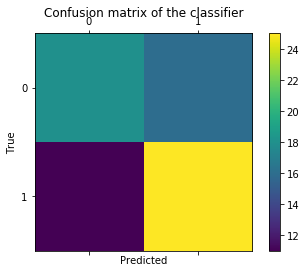

In [27]:

labels = [0, 1]
cm = confusion_matrix(y_test, y_pred, labels)
print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix of the classifier')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

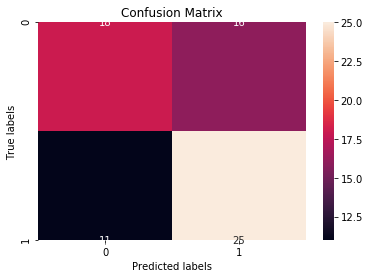

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels([0, 1]); ax.yaxis.set_ticklabels([0, 1]);


In [18]:
# Get some classifiers to evaluate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import SVC
seed = 1075
np.random.seed(seed)
# Create classifiers
#rf = RandomForestClassifier()
#et = ExtraTreesClassifier()
knn = KNeighborsClassifier()
svc1 = SVC(kernel='poly', degree=2, gamma='auto')
rbf = SVC(C=1,kernel='rbf',gamma='auto')
svc = SVC(kernel='linear')
#rg = RidgeClassifier()
clf_array = [ knn,svc,svc1,rbf]
for clf in clf_array:
    vanilla_scores = cross_val_score(clf, X, Y, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, 
       max_samples=0.4, max_features=10, random_state=seed)
    bagging_scores = cross_val_score(bagging_clf, X, Y, cv=10, 
       n_jobs=-1)
    
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [cross {0}]"  
                       .format(clf.__class__.__name__, 
                       vanilla_scores.mean(), vanilla_scores.std()))
    print ("Mean of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n"
                       .format(clf.__class__.__name__, 
                        bagging_scores.mean(), bagging_scores.std()))

Mean of: 0.452, std: (+/-) 0.115 [cross KNeighborsClassifier]
Mean of: 0.523, std: (+/-) 0.132 [Bagging KNeighborsClassifier]

Mean of: 0.423, std: (+/-) 0.087 [cross SVC]
Mean of: 0.465, std: (+/-) 0.126 [Bagging SVC]

Mean of: 0.491, std: (+/-) 0.096 [cross SVC]
Mean of: 0.529, std: (+/-) 0.089 [Bagging SVC]

Mean of: 0.497, std: (+/-) 0.055 [cross SVC]
Mean of: 0.514, std: (+/-) 0.067 [Bagging SVC]

